In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:\\Users\\ahmed\\Documents\\data\\Online_retail_customer_transaction_clustered_data.csv')

In [4]:
df

,Unnamed: 0,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,...,Year,DayOfWeek,Hour,Minute,TimeOfDay,TotalPrice,recency,frequency,monetary,labels
0,0,0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,...,2010,1,8,26,Morning,15.30,89,297,5391.21,0
1,1,1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,...,2010,1,8,26,Morning,20.34,89,297,5391.21,0
2,2,2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,...,2010,1,8,26,Morning,22.00,89,297,5391.21,0
3,3,3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,...,2010,1,8,26,Morning,20.34,89,297,5391.21,0
4,4,4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,...,2010,1,8,26,Morning,20.34,89,297,5391.21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,9950,9996,537224,22623,BOX OF VINTAGE JIGSAW BLOCKS,2,2010-05-12 16:24:00,4.95,13174,United Kingdom,...,2010,2,16,24,Afternoon,9.90,0,90,742.85,0
9851,9951,9997,537224,21363,HOME SMALL WOOD LETTERS,2,2010-05-12 16:24:00,4.95,13174,United Kingdom,...,2010,2,16,24,Afternoon,9.90,0,90,742.85,0
9852,9952,9998,537224,21556,CERAMIC STRAWBERRY MONEY BOX,2,2010-05-12 16:24:00,2.55,13174,United Kingdom,...,2010,2,16,24,Afternoon,5.10,0,90,742.85,0
9853,9953,9999,537224,22497,SET OF 2 TINS VINTAGE BATHROOM,2,2010-05-12 16:24:00,4.25,13174,United Kingdom,...,2010,2,16,24,Afternoon,8.50,0,90,742.85,0


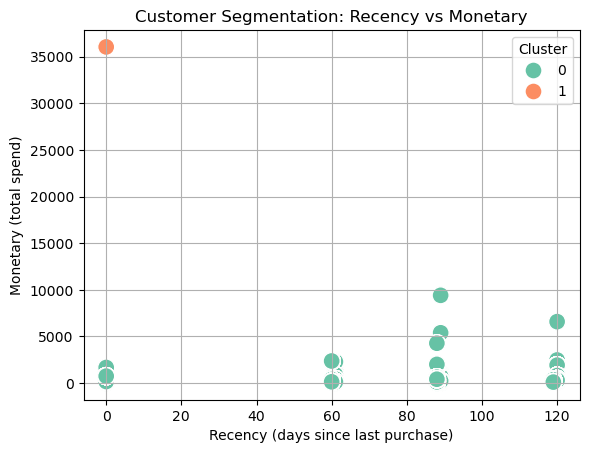

In [5]:
sns.scatterplot(data=df, x='recency', y='monetary', hue='labels', palette='Set2', s= 150)
plt.xlabel('Recency (days since last purchase)')
plt.ylabel('Monetary (total spend)')
plt.title('Customer Segmentation: Recency vs Monetary')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

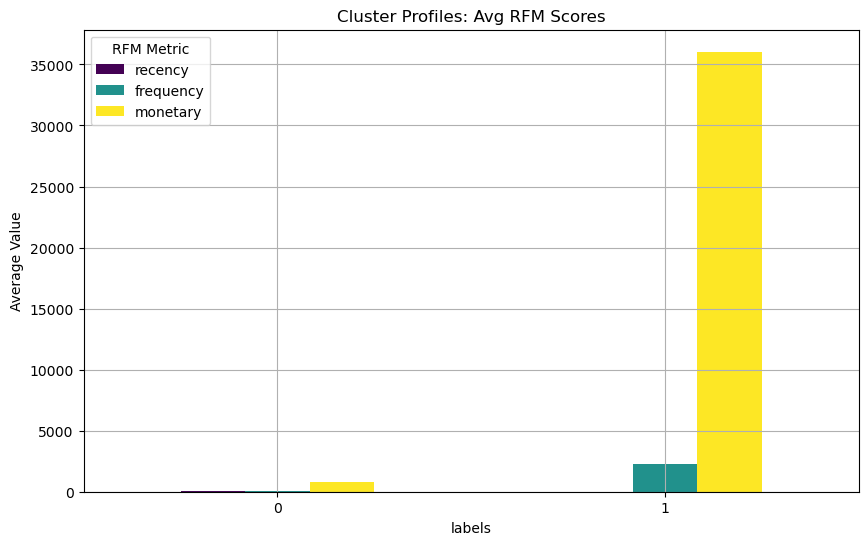

In [6]:
cluster_profiles = df.groupby('labels')[['recency', 'frequency', 'monetary']].mean().round(1)
cluster_profiles.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.title('Cluster Profiles: Avg RFM Scores')
plt.legend(title='RFM Metric')
plt.grid(True)
plt.show()

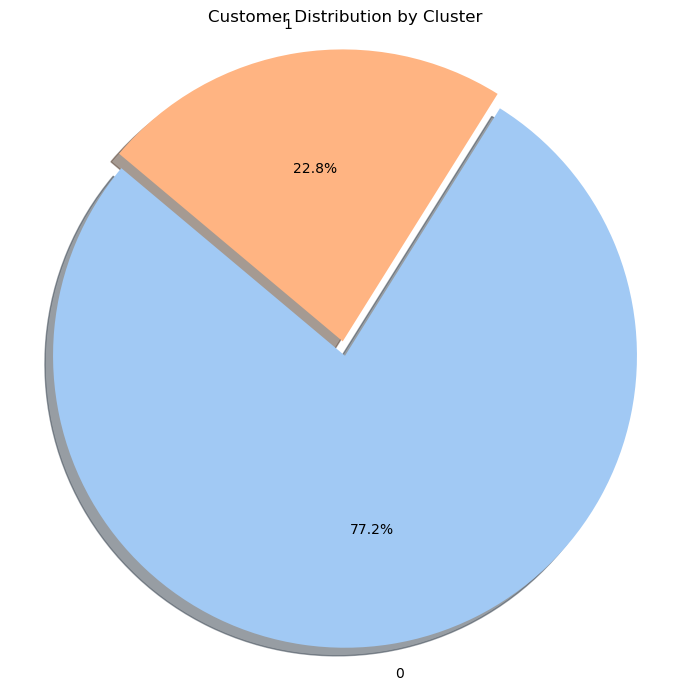

In [7]:
cluster_counts = df['labels'].value_counts()
labels = cluster_counts.index
sizes = cluster_counts.values
colors = sns.color_palette('pastel', len(labels))
explode = [0.05 if i == cluster_counts.idxmax() else 0 for i in labels]

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Customer Distribution by Cluster')
plt.axis('equal')
plt.tight_layout()
plt.show()

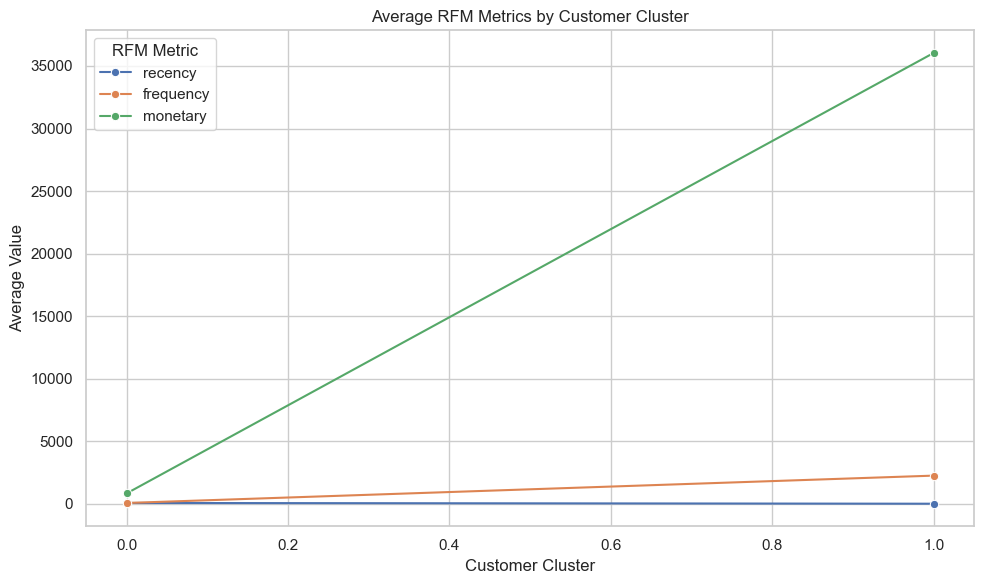

In [10]:
# Compute average RFM values per cluster
rfm_average = df.groupby('labels')[['recency', 'frequency', 'monetary']].mean().reset_index()

# Melt the DataFrame for Seaborn compatibility

rfm_melted = rfm_average.melt(id_vars='labels', var_name='Metric', value_name='Value')

# Plot using Seaborn

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=rfm_melted, x='labels', y='Value', hue='Metric', marker='o')

# Customize plot

plt.xlabel('Customer Cluster')
plt.ylabel('Average Value')
plt.title('Average RFM Metrics by Customer Cluster')
plt.legend(title='RFM Metric')
plt.tight_layout()
plt.show()
